The following demo code is used as templates for preparing different data visualizations for papers, presentations, and websites. The code and resulting figures are reproduced in a Romano Lab Notion wiki page for reference.

In [63]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from dataclasses import dataclass, field
from typing import Protocol

In [64]:
# Make datasets, train models, and store the results for plotting
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

@dataclass
class MLResult:
    name: str
    clf: Protocol
    auroc: float = 0
    tpr: list[float] = field(default_factory=list)
    fpr: list[float] = field(default_factory=list)
        
models = [
    MLResult(
        name = "Random Forest",
        clf = RandomForestClassifier()
    ),
    MLResult(
        name = "Logistic Regression",
        clf = LogisticRegression(max_iter=5000)
    ),
    MLResult(
        name = "Naive Bayes",
        clf = GaussianNB()
    )
]

for model in models:
    model.clf.fit(X_train, y_train)
    y_pred = model.clf.predict(X_test)
    y_pred_proba = model.clf.predict_proba(X_test)
    model.auroc = roc_auc_score(y_test, y_pred_proba[:,1], multi_class='ovr')
    model.fpr, model.tpr, _ = roc_curve(y_test, y_pred_proba[:,1])

In [65]:

def make_roc_plot(ml_results: list[MLResult], plot_title: str, output_fname: str = None):
    """
    Make a publication-ready ROC curve plot for comparing the performance
    of several ML algorithms.
    """
    # Create a figure and set default styling
    plt.figure(figsize = (6,6))
    plt.rc('font', size=20)
    plt.rc('axes', titlesize=20)
    plt.rc('axes', labelsize=20)
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    plt.rc('legend', fontsize=15)

    # Plot baseline performance ('random guessing')
    plt.plot([0,1], [0,1], color='grey', lw = 1, linestyle='--')

    # Plot results of ML
    for m in ml_results:
        this_label = f'{m.name}\n(AUC={round(m.auroc, 2)})'
        plt.plot(m.fpr, m.tpr, lw=2, label=this_label)

    # Finalize styling
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(plot_title)
    plt.legend(loc = 'lower right', frameon = False)
    plt.tight_layout()
    
    if output_fname:
        plt.savefig(f"{output_fname}.pdf")
    else:
        plt.show()
    
    plt.close()

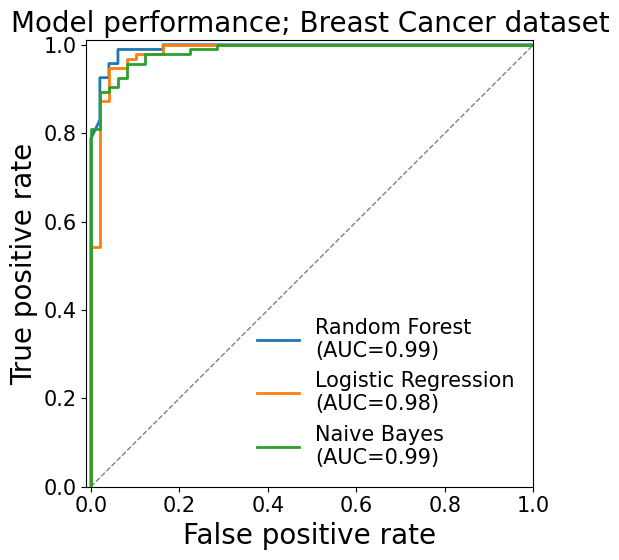

In [66]:
make_roc_plot(models, "Model performance; Breast Cancer dataset")